In [1]:
import matplotlib.pyplot as plt

import lecture3.training_data as td
from lecture3.model import MakemoreModel

%matplotlib inline

In [2]:
print("training examples:", len(td.Y_train))
print("dev examples:", len(td.Y_dev))
print("test examples:", len(td.Y_test))
print("Total parameters:", sum([param.numel() for param in MakemoreModel().params]))


training examples: 182546
dev examples: 22840
test examples: 22760
Total parameters: 8108


Training Initial model...
      0 /    2000 LR=0.10 minibatch loss: 23.0071
   1000 /    2000 LR=0.01 minibatch loss: 2.8278
Initial model Loss after 2000 rounds: 2.4789164066314697
Training Less overconfident model...
      0 /    2000 LR=0.10 minibatch loss: 3.8876
   1000 /    2000 LR=0.01 minibatch loss: 2.6721
Less overconfident model Loss after 2000 rounds: 2.421722888946533


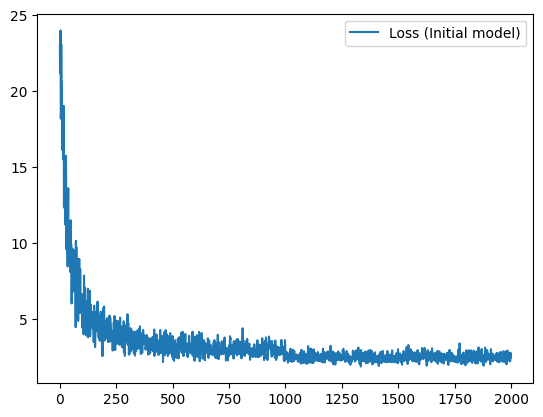

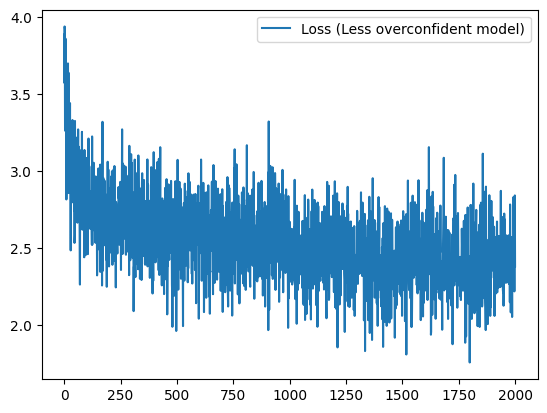

In [7]:
def evaluate_model(model, name, rounds=2000):
    print(f"Training {name}...")
    model.train(rounds)
    plt.figure()
    plt.plot(range(len(model.training_loss)), model.training_loss, label=f"Loss ({name})")
    plt.legend()
    print(f"{name} Loss after {rounds} rounds:", model.calc_loss_for_dataset(td.X_test, td.Y_test))

evaluate_model(MakemoreModel(w2_scale=1, b2_scale=1), name="Initial model")

evaluate_model(MakemoreModel(), name="Less overconfident model")



In [4]:
print("Final loss over training set:", model.calc_loss_for_dataset(td.X_train, td.Y_train))
print("Final loss over dev set:", model.calc_loss_for_dataset(td.X_dev, td.Y_dev))

NameError: name 'model' is not defined

In [ ]:
for _ in range(10):
    print(model.predict())


navy
yari
alas
vevioriel
hassineyle
calinn
faivye
xasoe
kaaminamirah
zalrne


In [ ]:
for _ in range(10): print(model.predict('atu'))

atulera
atumhyasiy
atuitan
atuuonem
atuirah
atua
atui
atulali
atulyna
atulexn


(array([2244.,  259.,  223.,  164.,  172.,  154.,  174.,  195.,  292.,
        2523.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <BarContainer object of 10 artists>)

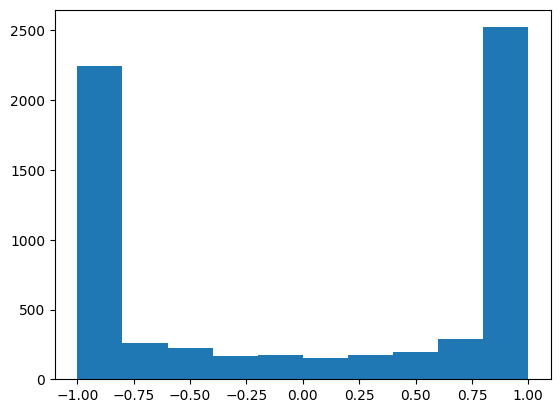

In [ ]:
from lecture3.training_data import X_train

result = model.forward(X_train[:32])

plt.hist(result.CXW1.view(-1).tolist())

(array([  7.,  37.,  75., 159., 201., 184., 103.,  58.,  27.,  13.]),
 array([-4.5934968 , -3.63977447, -2.68605213, -1.7323298 , -0.77860746,
         0.17511487,  1.1288372 ,  2.08255954,  3.03628187,  3.99000421,
         4.94372654]),
 <BarContainer object of 10 artists>)

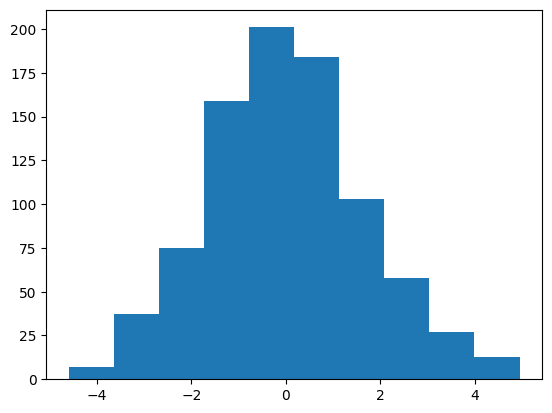

In [ ]:
plt.hist(result.logits.view(-1).tolist())

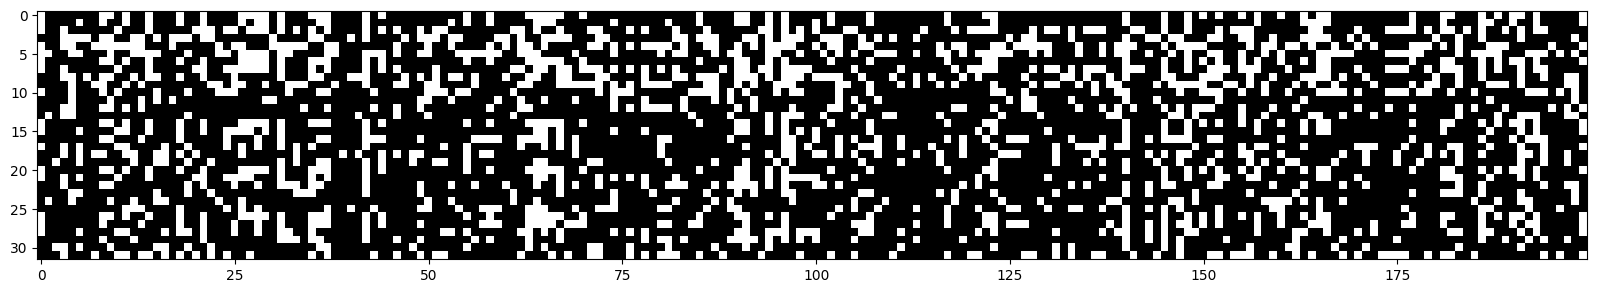

In [ ]:
plt.figure(figsize=(20, 10))
plt.imshow(result.CXW1.abs() > 0.999, cmap="gray", interpolation="nearest")